In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/Heart_Disease_Prediction/heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df.shape

(920, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [10]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [11]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [12]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [13]:
df["target"] = df["num"].apply(lambda x: 0 if x==0 else 1)
df.drop("num", axis=1, inplace=True)

In [14]:
#DATA CLEANING

# Replace '?' if present
df.replace("?", np.nan, inplace=True)

# Convert to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values
df.fillna(df.median(), inplace=True)


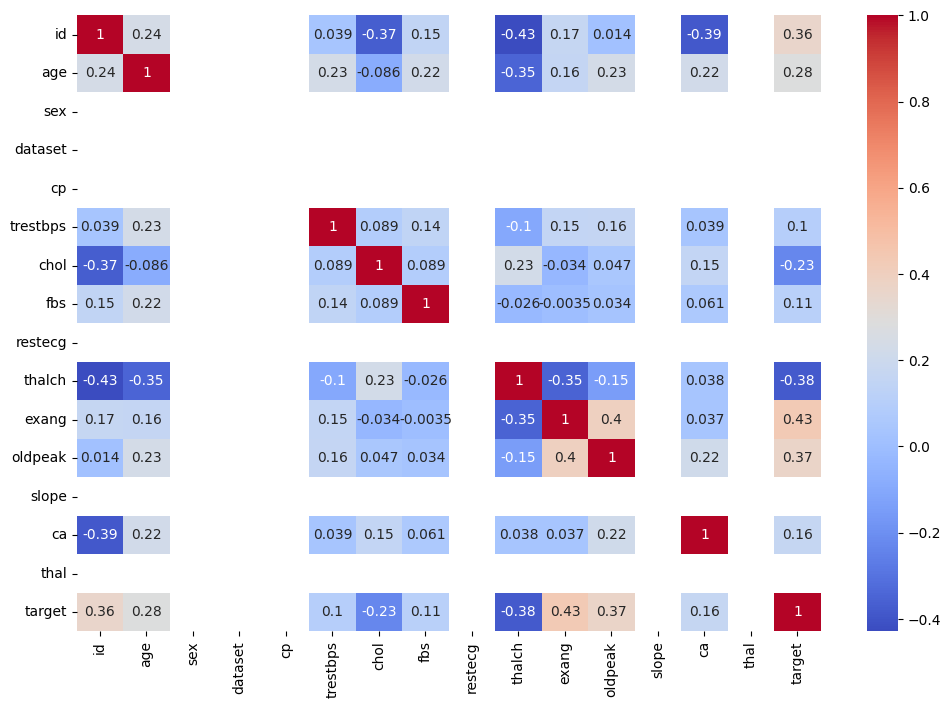

In [15]:
# EDA
# 1) Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

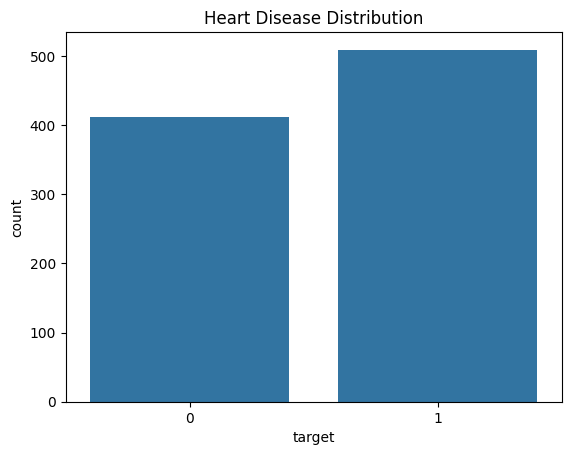

In [16]:
# 2) Target Distribution
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()

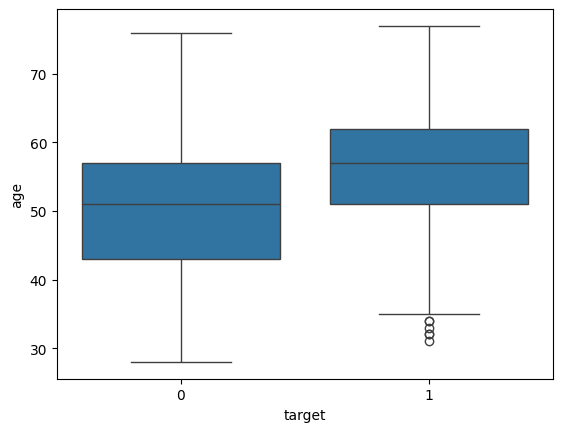

In [17]:
# 3) Age Vs Disease
sns.boxplot(x="target", y="age", data=df)
plt.show()

In [18]:
# Feature and Target Split
X = df.drop("target", axis=1)
y = df["target"]

In [19]:
# Test and Train Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [21]:
# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [34]:
y_pred = lr.predict(X_test)


In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8152173913043478

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.76      0.78        82
           1       0.81      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        82
           1       0.84      0.91      0.87       102

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [40]:
import joblib

joblib.dump(lr, "/content/drive/MyDrive/heart_lr_model.pkl")
joblib.dump(rf, "/content/drive/MyDrive/heart_rf_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/scaler.pkl")

['/content/drive/MyDrive/scaler.pkl']

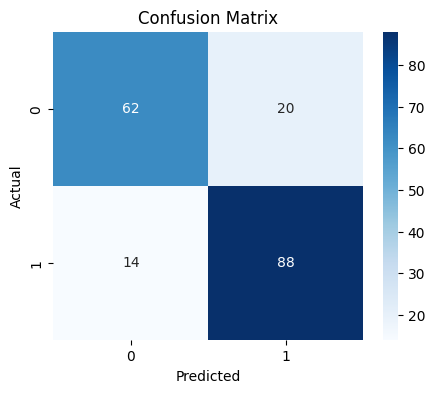

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [35]:
# Comparison Table
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": lr,
    "Random Forest": rf
}

results = []

for name, model_instance in models.items():
    y_pred = model_instance.predict(X_test)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

import pandas as pd

result_df = pd.DataFrame(
    results,
    columns=["Model","Accuracy","Precision","Recall","F1-Score"]
)

result_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.815217,0.814815,0.862745,0.838095
1,Random Forest,0.853261,0.837838,0.911765,0.873239


In [41]:
# ROC
# Logistic Regression
from sklearn.metrics import roc_curve, auc

y_prob_lr = lr.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)


In [42]:
# Random Forest
y_prob_rf = rf.predict_proba(X_test)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


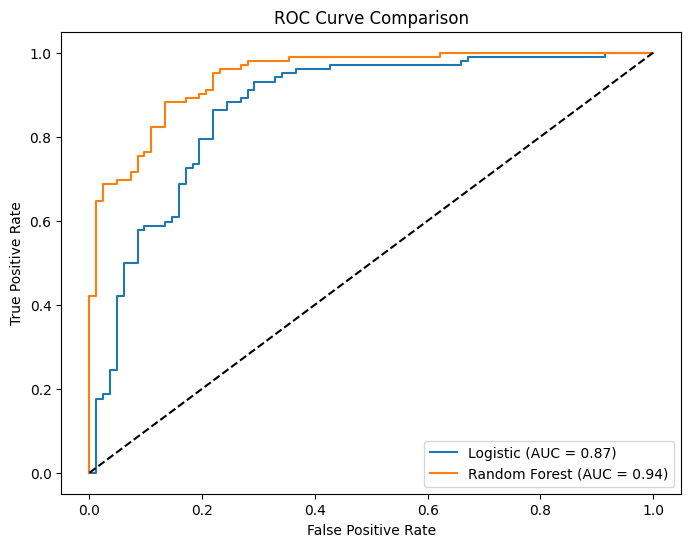

In [43]:
# ROC CURVE
plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [44]:
# PREDICTING HEART DISEASE FOR A NEW PATIENT

In [50]:
import joblib

joblib.dump(rf, "/content/drive/MyDrive/heart_rf_model.pkl")

['/content/drive/MyDrive/heart_rf_model.pkl']

In [51]:
import joblib

lr = joblib.load("/content/drive/MyDrive/heart_rf_model.pkl")

In [52]:

new_patient = np.array([[

    55,    # age
    140,   # trestbps
    240,   # chol
    150,   # thalach
    1.2,   # oldpeak
    2,     # cp
    0,     # exang
    1,     # slope
    0      # ca

]])


In [53]:
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [54]:
scaler = joblib.load("scaler.pkl")


In [55]:
new_patient = scaler.transform(new_patient)


In [56]:
prediction = lr.predict(new_patient)
probability = lr.predict_proba(new_patient)

print("Prediction:", prediction)
print("Risk Probability:", probability)

Prediction: [0]
Risk Probability: [[0.50740389 0.49259611]]


In [57]:
if prediction[0] == 1:
    print("High Risk of Heart Disease")
else:
    print(" Low Risk of Heart Disease")


 Low Risk of Heart Disease
